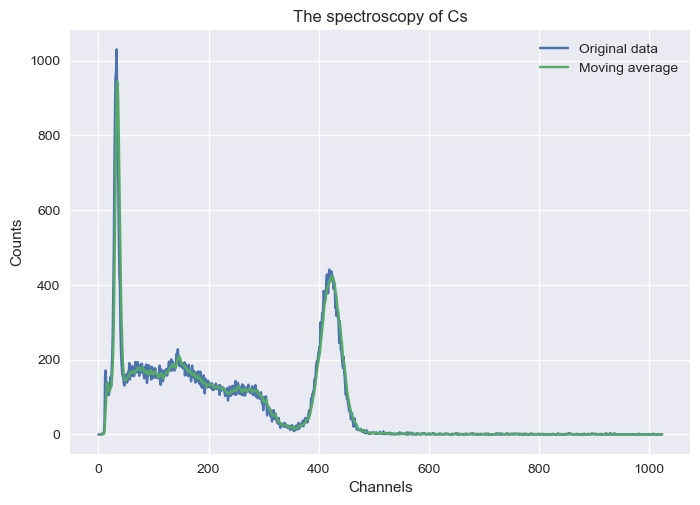

In [1]:
#Lets start the process of importing the data and the clearing of the 000 string
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


with open('PGZ_CS.ASC', 'r') as f: #name of the file
    lines = f.readlines()

lines = lines[5:]

data = np.empty(())
for line in lines:
    values = line.strip().split(',')
    data = np.append(data,values)
data = np.char.replace(data, ' ', '')
data = data[1:]
data = data.astype(float)
#Now to make the channel and counts arrays
chan = np.empty(())
count = np.empty(())
spike_Cs = np.empty(())
spike_range_Cs = np.empty(())
fitting_final = np.empty((3,3))

chan = data[::2]
count = data[1::2]
for index in range(np.size(count)):
    count[index] = count[index]/1000 
    if (index>380 and index<490):
        spike_Cs = np.append(spike_Cs,count[index])
        spike_range_Cs = np.append(spike_range_Cs , index)
x = chan
y = count

# Calculate the moving average with a window of size 5
window_size = 5
moving_average = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Plot the original data and the moving average
plt.style.use('seaborn')
plt.plot(x, y, label='Original data')
plt.plot(x[window_size-1:], moving_average, label='Moving average')
plt.title('The spectroscopy of Cs')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Cs_spectroscopy.png')
plt.legend()
plt.show()


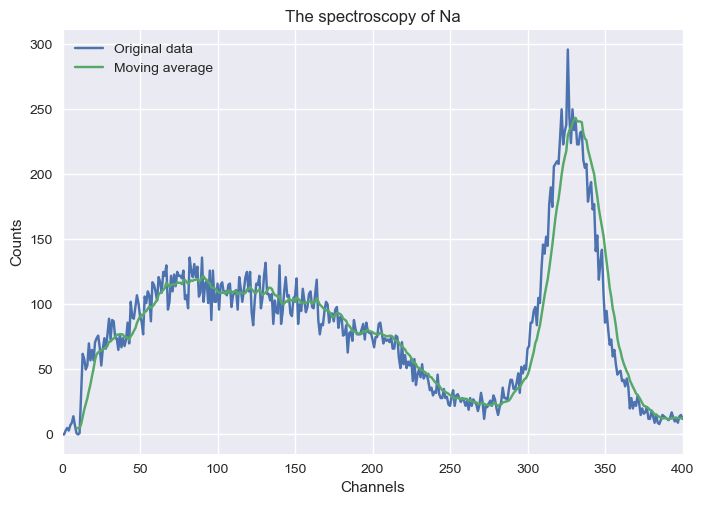

In [2]:
#Lets start the process of importing the data and clearing of the 000 string
import numpy as np
import matplotlib.pyplot as plt

with open('PGZ_NA.ASC', 'r') as f:
    lines = f.readlines()

lines = lines[5:]

data = np.empty(())
for line in lines:
    values = line.strip().split(',')
    data = np.append(data,values)
data = np.char.replace(data, ' ', '')
data = data[1:]
data = data.astype(float)
#Now to make the channel and counts arrays
chan = np.empty(())
count = np.empty(())
spike_Na = np.empty(())
spike_range_Na = np.empty(())
spike2_Na = np.empty(())
spike2_range_Na = np.empty(())

chan = data[::2]
count = data[1::2]
for index in range(np.size(count)):
    count[index] = count[index]/1000 
    if (index>280 and index<400):
        spike_Na = np.append(spike_Na,count[index])
        spike_range_Na = np.append(spike_range_Na,index)
    if (index>725 and index<850):
        spike2_Na = np.append(spike2_Na,count[index])
        spike2_range_Na = np.append(spike2_range_Na,index)

x = chan
y = count

# Calculate the moving average with a window of size 5
window_size = 10
moving_average = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Plot the original data and the moving average
plt.plot(x, y, label='Original data')
plt.plot(x[window_size-1:], moving_average, label='Moving average')
plt.title('The spectroscopy of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.style.use('seaborn')
plt.xlim(0,400)
plt.savefig('Na_spectroscopy.png')
plt.legend()
plt.show()


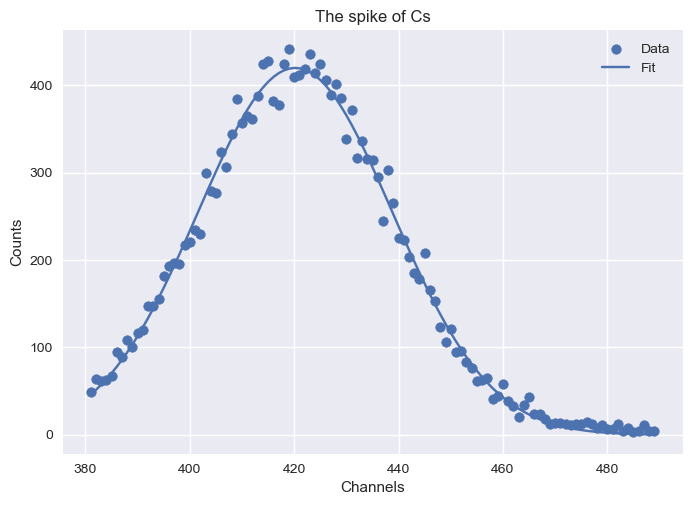

The amplitude is 419.90866785265393 with an error of 2.9829162502535813
The mean is 420.182249145738 with an error of 0.1528272038913267
The st_deviation is 18.633175432434086 with an error of 0.1570290110913196
[[4.19908668e+002 4.20182249e+002 1.86331754e+001]
 [0.00000000e+000 0.00000000e+000 1.30433331e-320]
 [7.98071271e+151 1.05820672e-153 3.98564036e+252]]


In [3]:
#The first element is always (0,0) for some reason i'm too bored to fix
spike_range_Cs =spike_range_Cs[1:]
spike_Cs = spike_Cs[1:]

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

initial_guess = [450 , 420 , 5]
popt, pcov = curve_fit(gaussian, spike_range_Cs, spike_Cs,p0=initial_guess)


plt.scatter(spike_range_Cs, spike_Cs, label='Data')
plt.plot(spike_range_Cs, gaussian(spike_range_Cs, *popt), label='Fit')
plt.title('The spike of Cs')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Cs_spike.png')
plt.legend()
plt.show()
for index in range(3):
    fitting_final[0][index]=popt[index]
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))
print(fitting_final)

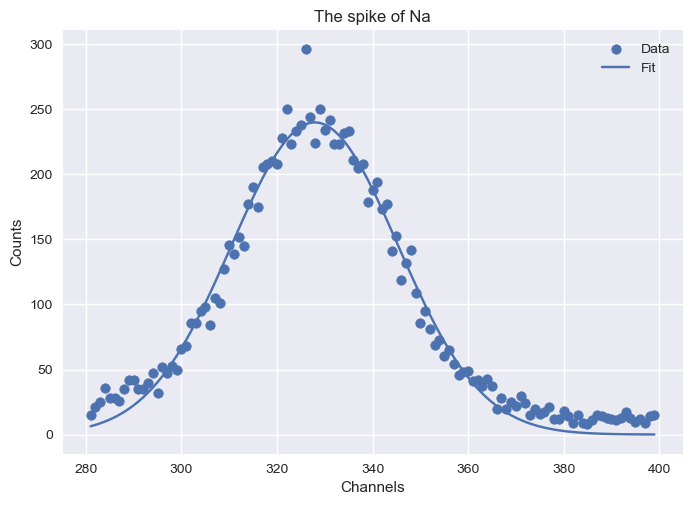

The amplitude is 239.983453358548 with an error of 2.8059558038969348
The mean is 327.9077934697624 with an error of 0.23505730060332844
The st_deviation is 17.418384658031087 with an error of 0.23581639591205958


In [4]:
spike_range_Na =spike_range_Na[1:]
spike_Na = spike_Na[1:]

initial_guess = [240 , 325 , 15]
popt, pcov = curve_fit(gaussian, spike_range_Na, spike_Na,p0=initial_guess)

plt.scatter(spike_range_Na, spike_Na, label='Data')
plt.plot(spike_range_Na, gaussian(spike_range_Na, *popt), label='Fit')
plt.title('The spike of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Na_spike.png')
plt.legend()
plt.show()
for index in range(3):
    fitting_final[1][index]=popt[index]
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))

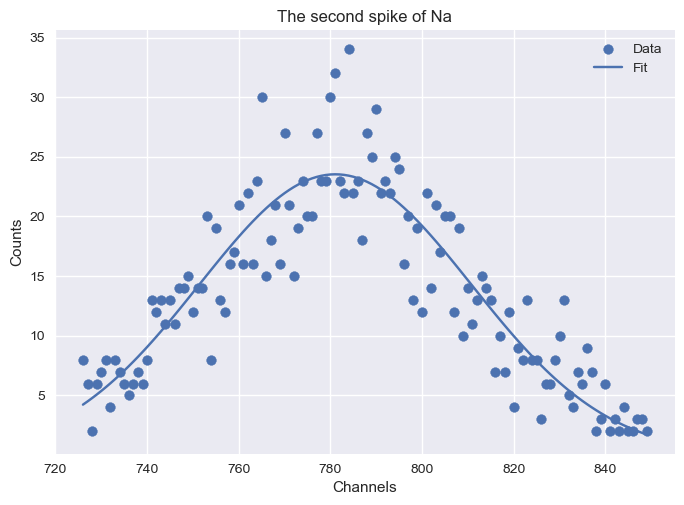

The amplitude is 23.536966573313638 with an error of 0.589076717189094
The mean is 781.0753378757056 with an error of 0.8618272818147852
The st_deviation is 29.725130349659405 with an error of 0.9257819615889927


In [5]:
spike2_range_Na =spike2_range_Na[1:]
spike2_Na = spike2_Na[1:]


initial_guess = [35 , 775 , 15]
popt, pcov = curve_fit(gaussian, spike2_range_Na, spike2_Na,p0=initial_guess)


plt.scatter(spike2_range_Na, spike2_Na, label='Data')
plt.plot(spike2_range_Na, gaussian(spike2_range_Na, *popt), label='Fit')
plt.title('The second spike of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Na_spike_2.png')
plt.legend()
plt.show()
for index in range(3):
    fitting_final[2][index]=popt[index]
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))

Slope:  1.6885656557824509
Intercept:  -44.982047836317975
R-squared:  0.9999577037925418


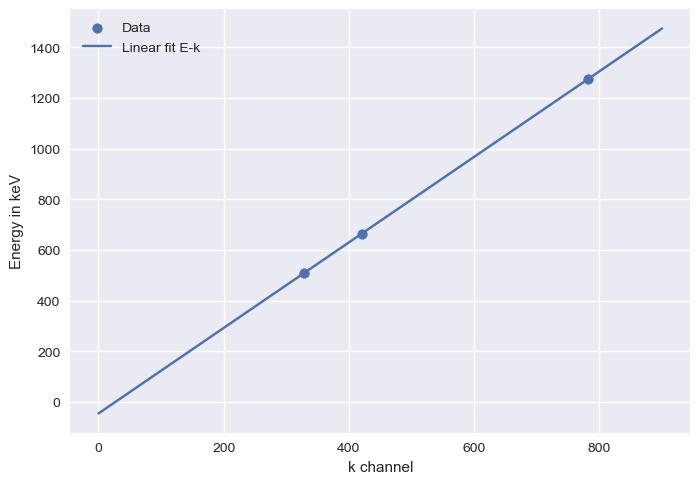

461.5876488984173
166.0886591364884


In [6]:
spike = np.empty((3))
std_k = np.empty((3))
for index in range(3):
    spike[index] = fitting_final[index][1]
real = np.array([661.65,511.,1274.5 ]) #keV
for index in range(3):
    std_k[index] = fitting_final[index][2]



slope, intercept, r_value, p_value, std_err = linregress(spike, real)

# Print the results
s = slope
i = intercept
x = np.linspace(0,900,2)
def linfit(x):
    return s*x+i
y = linfit(x)
pvalue = s/i
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
plt.scatter(spike ,real, label ='Data')
plt.plot(x,y, label='Linear fit E-k')
plt.legend(loc='upper left')
plt.xlabel('k channel')
plt.ylabel('Energy in keV')
plt.savefig('Linear.png')
plt.show()
#Compton edges for Cs and Na
print(linfit(300))
print(linfit(125))

Slope:  0.8142689592175096
Intercept:  -0.0066403646389489625
R-squared:  0.9902394692026733


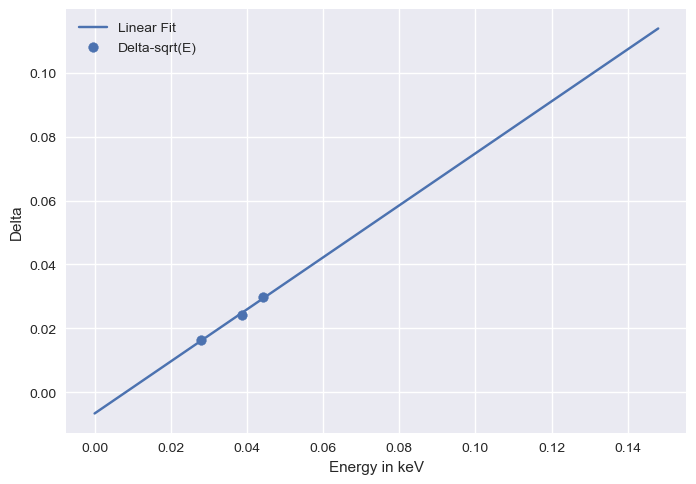

In [7]:
#Calculate the precision
delta = np.empty((3))
inv_sq_en = np.empty(3)
for index in range(3):
    delta[index] = (2*1.177 *math.sqrt(std_k[index]))/(spike[index]+pvalue)
    inv_sq_en[index] = 1/math.sqrt(linfit(spike[index]))

slope, intercept, r_value, p_value, std_err = linregress(inv_sq_en, delta)
x = np.arange(0,0.15,0.002)
def otherlinfit(x):
    return slope*x+intercept
y = otherlinfit(x)
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
plt.plot(x,y , label='Linear Fit')
plt.scatter(inv_sq_en,delta, label='Delta-sqrt(E)')
plt.legend(loc='upper left')
plt.ylabel('Delta')
plt.xlabel('Energy in keV')
plt.savefig('Linear-delta.png')
plt.show()

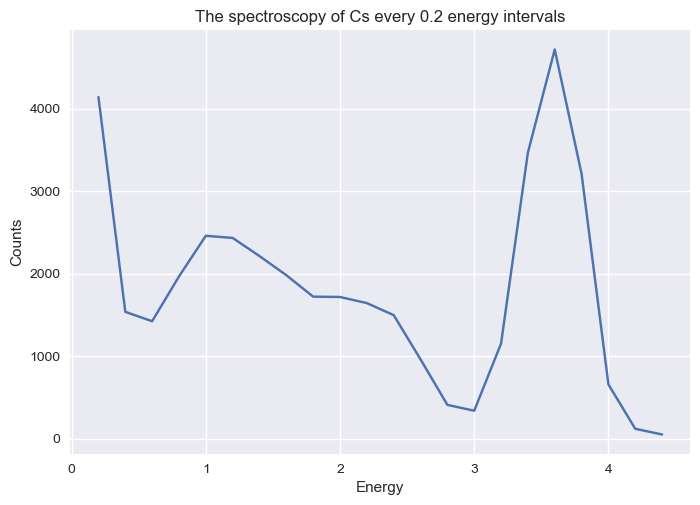

In [8]:
x_data = np.arange(0.2 , 4.6 , 0.2)
y_data = np.array([4141,1537,1423,1966,2459,2433,2213,1981,1721,1717,1643,1497,961,409,338,1152,3468,4718,3210,657,119,50])
plt.plot(x_data , y_data)
plt.title('The spectroscopy of Cs every 0.2 energy intervals')

plt.xlabel('Energy')
plt.ylabel('Counts')
plt.savefig('Cs_spectroscopy_analogical.png')

In [9]:
from PIL import Image

img1 = Image.open("Cs_spike.png")
img2 = Image.open("Na_spike.png")
img3 = Image.open("Na_spike_2.png")
k = 500

img1 = img1.resize((k, k))
img2 = img2.resize((k, k))
img3 = img3.resize((k, k))


collage = Image.new('RGB', (2*k, 2*k),(255,255,255))

collage.paste(img1, (0, 0))
collage.paste(img2, (k, 0))
collage.paste(img3, (int(k/2), k))

collage.save("collage.png")
#This code is for making a collage of the three spikes

In [10]:
print(fitting_final) #The form is Amplitude, Mean, Standard_Deviation

[[419.90866785 420.18224915  18.63317543]
 [239.98345336 327.90779347  17.41838466]
 [ 23.53696657 781.07533788  29.72513035]]


In [11]:
import pandas as pd
df = pd.DataFrame(fitting_final)

# Save the DataFrame to an Excel file
df.to_excel('fitting_final.xlsx', index=False) #To save that array as an excel for easier presentation